In [1]:
import pandas as pd 

iqvu = pd.read_csv("csvs/bd_iqvu_1994_2016.csv", sep=";", encoding="latin-1")

iqvu.rename(columns={
    'ï»¿SERIE': 'serie',
    'ANO': 'ano',
    'CODUP': 'cod_up',
    'NOMEUP': 'nome',
    'IQVU_3_Educacao': 'iqvu_educacao',
    'IQVU_5_Habitacao': 'iqvu_habitacao',
    'IQVU_6_Infra-estrutura_urbana': 'iqvu_infraestrutura',
    'IQVU_7_Meio_Ambiente': 'iqvu_meio_ambiente',
    'IQVU_8_Saude': 'iqvu_saude',
    'IQVU_9_Servicos_Urbanos': 'iqvu_servicos',
    'IQVU': 'iqvu'
}, inplace=True)

cols_num = [c for c in iqvu.columns if 'iqvu' in c.lower()]
for col in cols_num:
    iqvu[col] = iqvu[col].astype(str).str.replace(',', '.').astype(float)

# mantém apenas as colunas relevantes (as que de fato estão no CSV)
colunas_relevantes = [
    "ano",
    "cod_up",
    "nome",
    "iqvu",
    "iqvu_educacao",
    "iqvu_habitacao",
    "iqvu_infraestrutura",
    "iqvu_meio_ambiente",
    "iqvu_saude",
    "iqvu_servicos"
]

iqvu = iqvu[colunas_relevantes]

iqvu.head()



,ano,cod_up,nome,iqvu,iqvu_educacao,iqvu_habitacao,iqvu_infraestrutura,iqvu_meio_ambiente,iqvu_saude,iqvu_servicos
0,1994,1801,Bairro das Industrias,0.56663,0.80286,0.39397,0.79215,0.94153,0.31076,0.21086
1,1994,1802,Lindeia,0.49894,0.82445,0.36637,0.74293,0.94377,0.30881,0.22975
2,1994,1803,Barreiro de Baixo,0.60917,0.84877,0.45979,0.76782,0.92003,0.55129,0.50956
3,1994,1804,Barreiro de Cima,0.50348,0.85008,0.30021,0.74366,0.93919,0.40066,0.21326
4,1994,1805,Jatoba,0.43371,0.73843,0.16300,0.76044,0.93677,0.31868,0.16687


In [2]:
risco_inundacao = pd.read_csv('csvs/20250707_area-prioritaria-_sbn.csv', sep=";", encoding='latin-1')

colunas_analise = [
    'AREA_M2',
    'EXP_ALAG', 'EXP_DESL', 'EXP_INUN',
    'VUL_ALAG', 'VUL_DESL', 'VUL_INUN',
    'CON_AMB', 'CON_ANT', 'CON_TOT',
    'SBN_ALAG', 'SBN_DESL', 'SBN_INUN'
]

risco_inundacao = risco_inundacao[colunas_analise]
risco_inundacao.rename(columns={
    'EXP_ALAG': 'exposicao_alagamento',
    'EXP_DESL': 'exposicao_deslizamento',
    'EXP_INUN': 'exposicao_inundacao',
    'VUL_ALAG': 'vulnerabilidade_alagamento',
    'VUL_DESL': 'vulnerabilidade_deslizamento',
    'VUL_INUN': 'vulnerabilidade_inundacao',
    'CON_AMB': 'condicoes_ambientais',
    'CON_ANT': 'condicoes_humanas',
    'CON_TOT': 'condicoes_totais',
    'SBN_ALAG': 'risco_alagamento',
    'SBN_DESL': 'risco_deslizamento',
    'SBN_INUN': 'risco_inundacao'
}, inplace=True)

for col in risco_inundacao.columns:
    risco_inundacao[col] = risco_inundacao[col].astype(str).str.replace(',', '.').astype(float)

risco_inundacao.describe().round(2)


,AREA_M2,exposicao_alagamento,exposicao_deslizamento,exposicao_inundacao,vulnerabilidade_alagamento,vulnerabilidade_deslizamento,vulnerabilidade_inundacao,condicoes_ambientais,condicoes_humanas,condicoes_totais,risco_alagamento,risco_deslizamento,risco_inundacao
count,3046.00,3046.00,3046.00,3046.00,2395.00,759.00,537.00,3046.00,3046.00,3046.00,3046.00,759.00,537.00
mean,113408.63,0.91,0.42,0.08,2.41,2.61,2.19,1.43,0.90,1.17,1.21,1.63,1.49
std,109.85,0.65,1.00,0.31,1.23,1.38,1.24,1.02,1.10,0.80,0.79,0.75,0.51
min,113143.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.11
25%,113328.25,0.25,0.00,0.00,1.50,1.50,1.24,1.25,0.00,0.63,0.68,1.11,1.17
50%,113412.25,1.05,0.00,0.00,2.40,2.80,2.26,1.25,0.00,1.25,1.35,1.66,1.45
75%,113502.87,1.45,0.00,0.00,3.35,3.55,2.95,2.50,1.67,1.46,1.78,2.16,1.78
max,113613.74,4.20,5.00,3.80,5.00,5.00,5.00,5.00,5.00,4.38,3.59,3.90,3.18


/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver CSV does not support open option DELIMITER
  return ogr_read(
/opt/anaconda3/lib/python3.12/site-packages/pyogrio/raw.py:198: RuntimeWarning: driver CSV does not support open option DELIMITER
  return ogr_read(


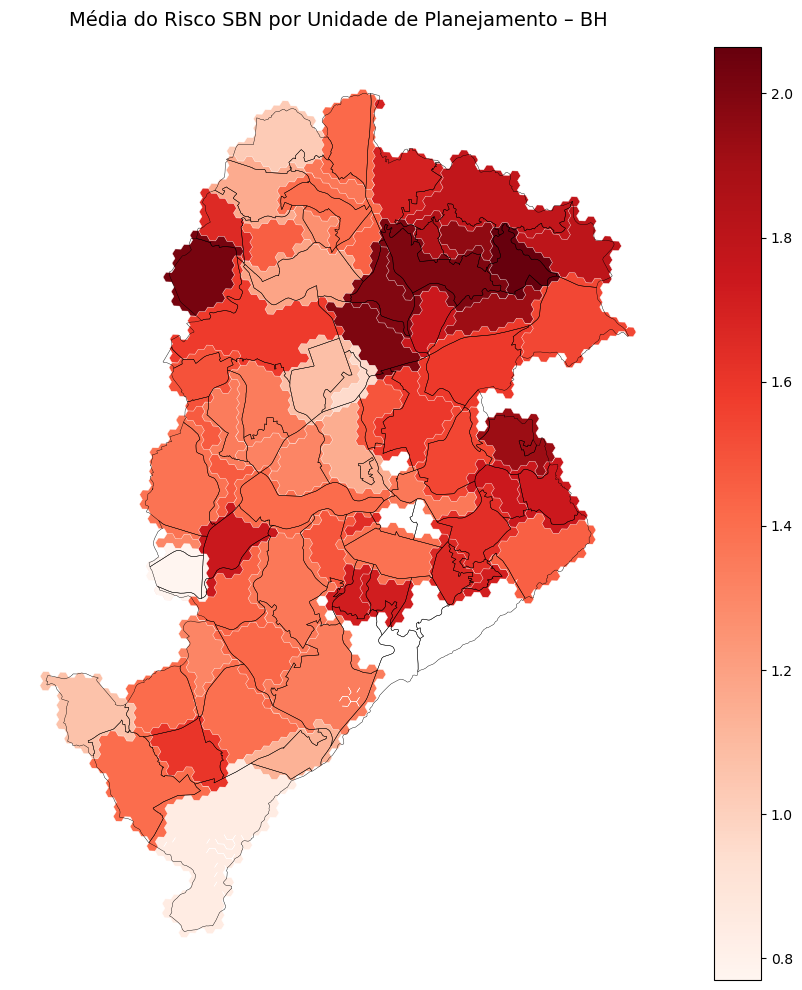

In [ ]:
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

# Ler CSV da SBN
area_prioritaria_sbn = gpd.read_file("csvs/20250707_area-prioritaria-_sbn.csv", delimiter=";")
area_prioritaria_sbn["geometry"] = area_prioritaria_sbn["GEOMETRIA"].apply(wkt.loads)
area_prioritaria_sbn = gpd.GeoDataFrame(area_prioritaria_sbn, geometry="geometry", crs="EPSG:31983")

# Corrigir campo numérico
area_prioritaria_sbn["SBN_INUN"] = (
    area_prioritaria_sbn["SBN_INUN"]
    .astype(str)
    .str.replace(",", ".")
    .str.extract("([0-9.]+)")[0]
    .astype(float)
)

#  Ler UPs
ups = gpd.read_file("csvs/20220601_unidade_planejamento.csv", delimiter=";")
ups["geometry"] = ups["GEOMETRIA"].apply(wkt.loads)
ups = gpd.GeoDataFrame(ups, geometry="geometry", crs="EPSG:31983")

# 4) Fazer o spatial join — associa cada área SBN à UP onde ela está
sbn_up = gpd.sjoin(
    area_prioritaria_sbn,
    ups[["NOME_UNID_PLANEJAMENTO", "geometry"]],
    how="left",
    predicate="intersects"
)

#  Agregar por UP  dissolve os polígonos da SBN dentro de cada UP
sbn_por_up = sbn_up.dissolve(
    by="NOME_UNID_PLANEJAMENTO",
    aggfunc={
        "SBN_INUN": "mean"  # média de risco por UP
    }
).reset_index()

#  Plotar
fig, ax = plt.subplots(figsize=(10, 10))

sbn_por_up.plot(
    ax=ax,
    column="SBN_INUN",
    cmap="Reds",
    linewidth=0.3,
    edgecolor="white",
    legend=True
)

ups.boundary.plot(ax=ax, color="black", linewidth=0.3)

ax.set_title("Média do Risco SBN por Unidade de Planejamento – BH", fontsize=14, pad=15)
ax.set_axis_off()
plt.tight_layout()
plt.show()


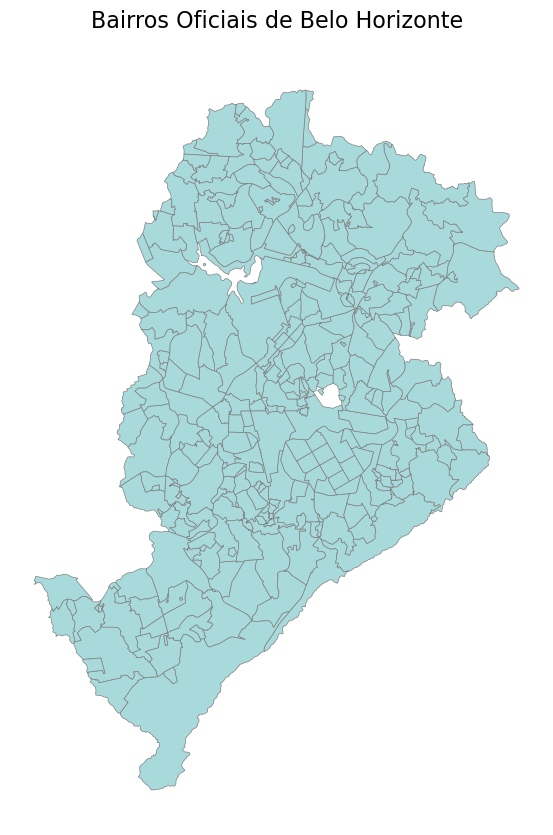

In [ ]:
# Lê o CSV dos bairros oficiais
bairros = pd.read_csv("csvs/20230502_bairro_oficial.csv", sep=",", encoding="latin-1")

# Converte a coluna GEOMETRIA em polígonos
bairros["geometry"] = bairros["GEOMETRIA"].apply(wkt.loads)

# Cria o GeoDataFrame
bairros = gpd.GeoDataFrame(bairros, geometry="geometry", crs="EPSG:31983")

# plot
fig, ax = plt.subplots(figsize=(10, 10))
bairros.plot(
    ax=ax,
    color="#a8dadc",      
    edgecolor="gray",     
    linewidth=0.5
)

ax.set_title("Bairros Oficiais de Belo Horizonte", fontsize=16, pad=20)
ax.set_axis_off()
plt.show()

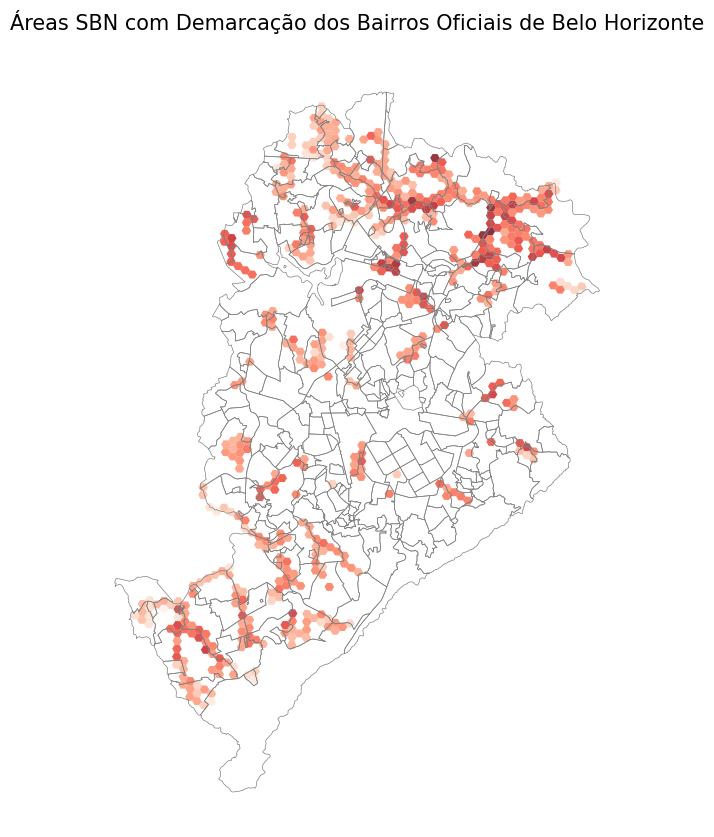

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))


area_prioritaria_sbn.plot(
    ax=ax,
    column="SBN_INUN",     # variável de cor
    cmap="Reds",           # tons de vermelho
    linewidth=0,           # sem borda
    alpha=0.8              # um pouco transparente
)


bairros.boundary.plot(
    ax=ax,
    color="gray",          # só contorno
    linewidth=0.5          # linha fininha
)

ax.set_title("Áreas SBN com Demarcação dos Bairros Oficiais de Belo Horizonte", fontsize=15, pad=20)
ax.set_axis_off()

plt.show()


In [6]:
import unicodedata
import geopandas as gpd

# garante o mesmo sistema de coordenadas
area_prioritaria_sbn = area_prioritaria_sbn.to_crs(bairros.crs)

# interseção espacial: liga áreas SBN aos bairros
risco_com_bairro = gpd.sjoin(
    area_prioritaria_sbn,
    bairros[["NOME", "geometry"]],
    how="left",
    predicate="intersects"
)

# normaliza o texto sem tentar recodificar (evita erro UnicodeDecodeError)
risco_com_bairro["NOME"] = risco_com_bairro["NOME"].apply(
    lambda x: unicodedata.normalize("NFKC", x) if isinstance(x, str) else x
)

# lista de colunas numéricas relevantes
cols_numericas = [
    "SBN_ALAG", "SBN_DESL", "SBN_INUN", "SBN_ONDA",
    "EXP_ALAG", "EXP_DESL", "EXP_INUN", "EXP_ONDA",
    "VUL_ALAG", "VUL_DESL", "VUL_INUN", "VUL_ONDA",
    "CON_AMB", "CON_ANT", "CON_TOT"
]

# garante que todas sejam numéricas (corrige vírgulas, converte pra float)
for c in cols_numericas:
    if c in risco_com_bairro.columns:
        risco_com_bairro[c] = (
            risco_com_bairro[c]
            .astype(str)
            .str.replace(",", ".")
            .str.extract(r"([-+]?\d*\.?\d+)")[0]
            .astype(float)
        )

# agrega estatísticas por bairro (médias e contagens)
agg_dict = {c: "mean" for c in cols_numericas if c in risco_com_bairro.columns}
agg_dict["geometry"] = "count"

resumo_bairros = (
    risco_com_bairro
    .groupby("NOME")
    .agg(agg_dict)
    .reset_index()
    .rename(columns={"geometry": "num_areas_risco"})
    .sort_values("num_areas_risco", ascending=False)
)

print("Médias e contagens por bairro:")
display(resumo_bairros.head(10))


Médias e contagens por bairro:


,NOME,SBN_ALAG,SBN_DESL,SBN_INUN,SBN_ONDA,EXP_ALAG,EXP_DESL,EXP_INUN,EXP_ONDA,VUL_ALAG,VUL_DESL,VUL_INUN,VUL_ONDA,CON_AMB,CON_ANT,CON_TOT,num_areas_risco
292,do Pilar,0.288000,0.838413,0.959286,1.017762,0.154762,0.803476,0.009143,1.820714,1.319811,1.404762,1.237857,1.431190,0.357143,0.436952,0.398000,210
250,SÃ£o LuÃ­z,0.970965,1.100000,1.517368,1.565175,0.828947,0.000614,0.119649,2.896053,2.189773,3.050000,2.945263,1.664474,1.129386,0.556404,0.845789,114
287,das Mangabeiras,0.256500,1.551370,NaN,0.894750,0.143750,2.026750,0.000000,1.661875,1.850000,2.374658,NaN,0.415625,0.921875,0.563000,0.744625,80
48,CapitÃ£o Eduardo,1.549487,1.643000,1.798182,2.251538,0.316026,0.125641,0.412692,2.752564,4.144531,3.985000,2.342424,3.263462,1.362179,1.326282,1.346538,78
276,VitÃ3ria,1.400921,1.693529,1.534375,2.121974,0.402632,0.278158,0.099211,2.682237,3.800943,3.335294,1.875000,2.586184,1.447368,1.492237,1.472237,76
144,Monte Azul,1.247917,1.984583,1.756429,1.939722,0.227083,0.487500,0.526806,2.263889,2.949020,2.743750,1.753214,1.949306,2.395833,1.066250,1.733750,72
295,dos Bandeirantes,0.459855,NaN,1.476667,1.305652,0.371739,0.000000,0.034348,2.399275,2.201786,NaN,3.286667,1.599275,0.942029,0.266232,0.607826,69
285,das IndÃostrias,1.228209,2.098750,1.350000,1.896567,1.076866,0.089851,0.196269,3.464179,1.853788,3.256250,1.894000,2.026866,1.156716,0.921045,1.041343,67
116,JatobÃ¡,1.409385,1.727143,1.567857,2.455385,1.033846,0.069385,0.175692,2.831538,0.713559,1.778571,1.072143,2.663077,2.076923,2.231077,2.156769,65
264,Tupi,2.077031,1.980000,1.984118,2.419531,0.964844,0.133125,0.224844,2.833594,4.254167,3.981818,3.281176,3.228125,2.558594,0.965000,1.764062,64


1 - AQUI COMECA A RESPONDER PERGUNTA 1 - 
Esse código serve pra juntar os dados dos bairros com as Unidades de Planejamento (UPs).
Como alguns bairros ficam divididos entre mais de uma UP, ele usa a porcentagem de área de cada bairro dentro da UP pra fazer uma média ponderada.
Assim, se um bairro está 70% numa UP e 30% em outra, o valor dele é dividido exatamente nessa proporção.
No final, o resultado é uma tabela com os indicadores médios de cada UP, calculados de forma proporcional à área dos bairros que fazem parte dela.


In [ ]:

#  Ler a tabela de correspondência bairro → UP


bairros_por_up = pd.read_csv("csvs/bairros_por_up.csv", encoding="utf-8")

# Corrige espaços e nomes de colunas
bairros_por_up.columns = bairros_por_up.columns.str.strip()

# Confere se o nome da coluna está correto agora
# print(bairros_por_up.columns)
# deve mostrar: ['ID_BAC', 'NOME', 'NOME_UNID_PLANEJAMENTO', 'perc_bairro_na_up']


# Juntar o resumo dos bairros com a tabela de UPs

resumo_bairros_up = resumo_bairros.merge(
    bairros_por_up,
    on="NOME",   # nome do bairro
    how="left"
)


#  Calcular médias ponderadas por UP

resumo_bairros_up["peso"] = resumo_bairros_up["perc_bairro_na_up"] / 100

# identifica as colunas numéricas (todas as médias calculadas)
cols_numericas = [
    c for c in resumo_bairros_up.columns
    if c not in ["ID_BAC", "NOME", "NOME_UNID_PLANEJAMENTO", "perc_bairro_na_up", "peso"]
       and pd.api.types.is_numeric_dtype(resumo_bairros_up[c])
]

# cria colunas ponderadas
for c in cols_numericas:
    resumo_bairros_up[f"{c}_pond"] = resumo_bairros_up[c] * resumo_bairros_up["peso"]


# 4. Agregar por Unidade de Planejamento

agg_dict = {f"{c}_pond": "sum" for c in cols_numericas}
agg_dict["NOME"] = "count"

resumo_up = (
    resumo_bairros_up
    .groupby("NOME_UNID_PLANEJAMENTO")
    .agg(agg_dict)
    .rename(columns={"NOME": "num_bairros"})
    .reset_index()
)

# remove o sufixo "_pond" dos nomes das colunas
resumo_up.columns = [col.replace("_pond", "") for col in resumo_up.columns]


# resultado 

print("\nResumo final por Unidade de Planejamento:")
display(resumo_up.head(10))



Resumo final por Unidade de Planejamento:


,NOME_UNID_PLANEJAMENTO,SBN_ALAG,SBN_DESL,SBN_INUN,SBN_ONDA,EXP_ALAG,EXP_DESL,EXP_INUN,EXP_ONDA,VUL_ALAG,VUL_DESL,VUL_INUN,VUL_ONDA,CON_AMB,CON_ANT,CON_TOT,num_areas_risco,num_bairros
0,Abílio Machado,3.629142,1.406390,3.879213,6.191447,2.992898,0.161228,0.102901,9.713037,5.627158,2.487144,6.055372,6.866181,5.116050,3.028005,4.078417,30.230495,3
1,Anchieta/Sion,1.948741,3.030431,0.000000,2.444224,2.074635,1.724855,0.000000,3.782741,3.333306,5.631431,0.000000,1.947052,2.096889,1.921260,2.013372,30.687264,2
2,Antônio Carlos,10.034510,7.333860,2.620000,15.095136,9.270338,1.788385,0.037333,22.470515,12.694137,9.898984,2.660000,19.669315,12.103601,6.015968,9.073370,62.977416,7
3,Baleia,6.349797,10.317614,4.290269,7.528159,2.491285,10.622838,0.130757,10.832062,16.612580,19.786692,6.435915,9.880429,5.447989,3.886025,4.675126,99.137237,5
4,Barragem,0.312706,2.201349,0.000000,1.821635,0.558403,2.586026,0.000000,2.320475,1.091988,3.710277,0.000000,2.456973,0.000000,2.481791,1.245859,3.970865,1
5,Barreiro de Baixo,3.573975,2.826029,5.214442,6.804014,3.910833,0.343086,0.876450,11.905719,3.249379,4.045877,5.606380,6.613787,5.436876,3.205671,4.329147,83.196975,4
6,Barreiro de Cima,8.925894,5.687318,6.112394,12.060946,5.023572,2.326296,1.263308,14.231286,11.879902,9.618304,7.403758,14.080532,8.437272,11.042392,9.754313,83.298584,5
7,Barreiro-Sul,0.807710,2.053763,1.373811,1.862588,0.421597,2.509843,0.111463,3.223536,2.770380,4.053712,2.362669,3.031704,0.816335,0.343381,0.582749,172.028842,2
8,Barro Preto,1.557552,2.006404,1.596734,1.661344,1.473791,0.377154,0.032549,2.754111,2.543514,3.932730,4.426673,1.353156,0.967353,1.556642,1.263932,42.085551,1
9,Barroca,5.259798,3.317846,2.627273,6.263999,5.583381,0.648524,0.046291,11.453295,7.501379,5.463393,5.867010,5.351095,5.345459,2.843157,4.103993,67.501237,4


Esse código descobre quanto de cada bairro está dentro de cada Unidade de Planejamento (UP).
Primeiro ele lê os mapas dos bairros e das UPs e transforma as informações de texto em formas geométricas que o Python entende.
Depois ele sobrepõe os dois mapas, cortando os bairros pelas fronteiras das UPs.
Com isso, ele mede a área de cada pedaço e calcula a porcentagem do bairro que fica em cada UP.
No fim, ele salva uma tabela mostrando, por exemplo, que um bairro está 70% em uma UP e 30% em outra.
No final ele gera um arquivo bairros_por_up.csv


In [ ]:
#  Ler os CSVs
bairros = pd.read_csv("csvs/20230502_bairro_oficial.csv")
ups = pd.read_csv("csvs/20220601_unidade_planejamento.csv")

#  Converter a coluna 'GEOMETRIA' de texto WKT para objetos geométricos
bairros["geometry"] = bairros["GEOMETRIA"].apply(wkt.loads)
ups["geometry"] = ups["GEOMETRIA"].apply(wkt.loads)

# Criar GeoDataFrames com o mesmo sistema de coordenadas (usa o mesmo CRS projetado)
bairros = gpd.GeoDataFrame(bairros, geometry="geometry", crs="EPSG:31983")
ups = gpd.GeoDataFrame(ups, geometry="geometry", crs="EPSG:31983")

# Corrigir eventuais geometrias inválidas
bairros["geometry"] = bairros.buffer(0)
ups["geometry"] = ups.buffer(0)

# Fazer a interseção espacial (cada pedaço do bairro que cai em uma UP)
intersec = gpd.overlay(bairros, ups, how="intersection")

# 6) Calcular a área de cada interseção (em m²)
intersec["area_intersect"] = intersec.geometry.area

# Calcular a proporção da área de cada bairro dentro de cada UP
area_bairro = intersec.groupby("ID_BAC")["area_intersect"].sum().rename("area_total_bairro")
intersec = intersec.merge(area_bairro, on="ID_BAC")
intersec["perc_bairro_na_up"] = (intersec["area_intersect"] / intersec["area_total_bairro"]) * 100

#  Se quiser só o par principal (UP dominante de cada bairro)
bairros_up = (
    intersec.sort_values("perc_bairro_na_up", ascending=False)
    .groupby("ID_BAC")
    .first()
    .reset_index()[["ID_BAC", "NOME", "NOME_UNID_PLANEJAMENTO", "perc_bairro_na_up"]]
)

#  Salvar resultado
bairros_up.to_csv("bairros_por_up.csv", index=False)

Esse código cria um mapa de correlação entre as variáveis numéricas do resumo por Unidade de Planejamento (UP).
Primeiro ele separa só as colunas com números, depois calcula a correlação entre elas , ou seja o quanto uma variável está relacionada com a outra.
Por fim, ele desenha um heatmap (mapa de calor) colorido: tons de vermelho mostram correlação positiva (as variáveis aumentam juntas) e tons de azul mostram correlação negativa (quando uma aumenta, a outra diminui).
É uma forma visual de entender quais indicadores têm comportamento parecido ou contrário dentro das UPs.

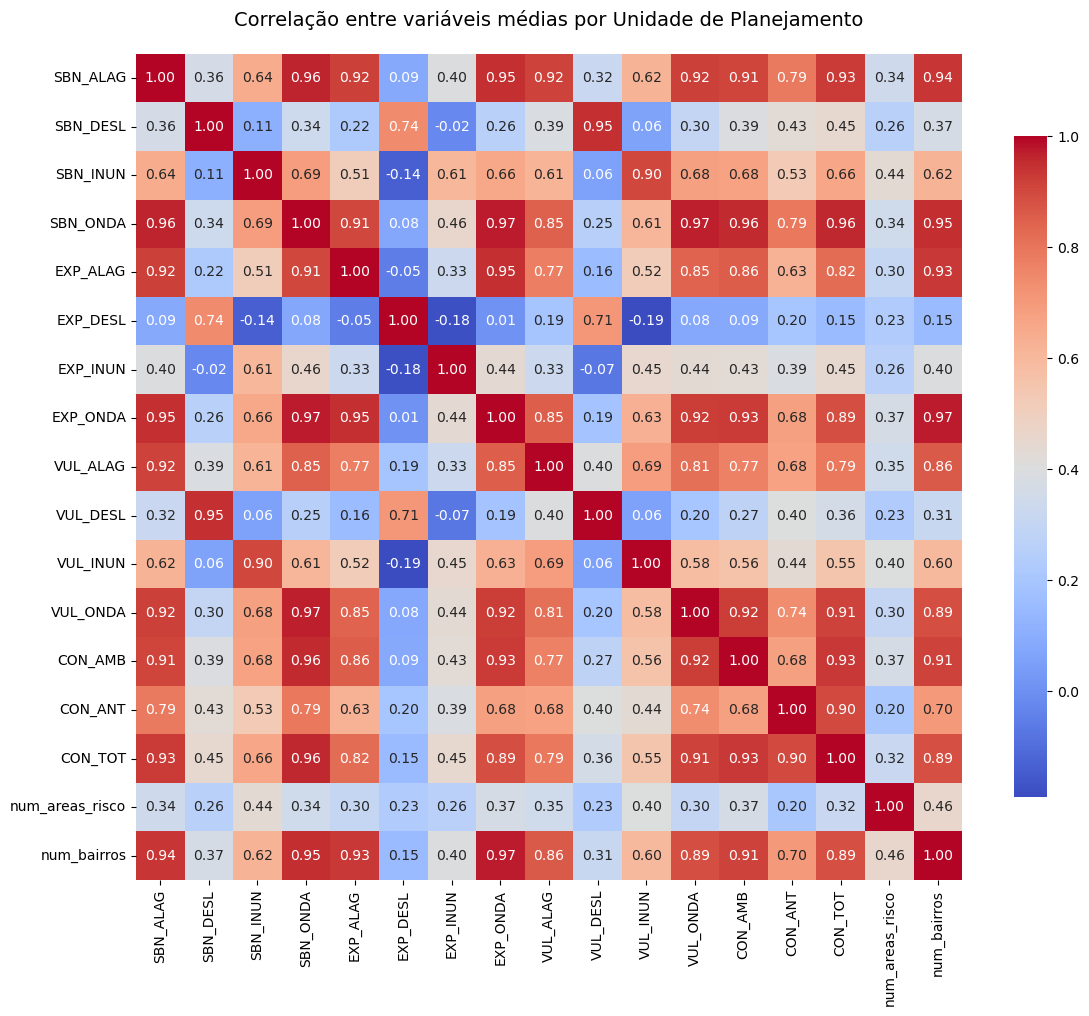

In [9]:
import seaborn as sns


# Selecionar apenas as colunas numéricas do resumo por UP
variaveis_numericas_up = resumo_up.select_dtypes(include=['float64', 'int64']).columns

# Criar DataFrame apenas com as colunas numéricas
df_corr_up = resumo_up[variaveis_numericas_up]

# Matriz de correlação
corr_matrix_up = df_corr_up.corr()

# Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix_up,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlação entre variáveis médias por Unidade de Planejamento", fontsize=14, pad=20)
plt.tight_layout()
plt.show()



Esse código junta os dados do IQVU mais recente com o resumo das Unidades de Planejamento (UPs).
Primeiro ele escolhe, pra cada UP, o último ano disponível do IQVU , ou seja, a versão mais atual do índice.
Depois ele padroniza os nomes, deixando tudo em maiúsculas e sem espaços extras, pra evitar erro na hora de juntar.
Por fim, ele faz a junção das duas tabelas: o resumo das UPs de um lado e os valores do IQVU do outro.
O resultado é uma tabela completa, com as informações atuais de qualidade de vida associadas a cada Unidade de Planejamento.

In [10]:
# Seleciona o último ano de IQVU por UP
iqvu_recente = (
    iqvu.loc[iqvu.groupby("nome")["ano"].idxmax()]
    .reset_index(drop=True)
)

# Padroniza nomes
resumo_up["NOME_UNID_PLANEJAMENTO"] = resumo_up["NOME_UNID_PLANEJAMENTO"].str.upper().str.strip()
iqvu_recente["nome"] = iqvu_recente["nome"].str.upper().str.strip()

# Faz o merge
dados_up = resumo_up.merge(
    iqvu_recente,
    left_on="NOME_UNID_PLANEJAMENTO",
    right_on="nome",
    how="left"
)

print(dados_up.head())
print(dados_up.shape)


  NOME_UNID_PLANEJAMENTO   SBN_ALAG   SBN_DESL  SBN_INUN   SBN_ONDA  EXP_ALAG  \
0         ABÍLIO MACHADO   3.629142   1.406390  3.879213   6.191447  2.992898   
1          ANCHIETA/SION   1.948741   3.030431  0.000000   2.444224  2.074635   
2         ANTÔNIO CARLOS  10.034510   7.333860  2.620000  15.095136  9.270338   
3                 BALEIA   6.349797  10.317614  4.290269   7.528159  2.491285   
4               BARRAGEM   0.312706   2.201349  0.000000   1.821635  0.558403   

    EXP_DESL  EXP_INUN   EXP_ONDA   VUL_ALAG  ...     ano  cod_up  \
0   0.161228  0.102901   9.713037   5.627158  ...     NaN     NaN   
1   1.724855  0.000000   3.782741   3.333306  ...  2016.0  1907.0   
2   1.788385  0.037333  22.470515  12.694137  ...     NaN     NaN   
3  10.622838  0.130757  10.832062  16.612580  ...  2016.0  2007.0   
4   2.586026  0.000000   2.320475   1.091988  ...  2016.0  1912.0   

            nome      iqvu  iqvu_educacao  iqvu_habitacao  \
0            NaN       NaN           

Esse código mede como cada parte do IQVU se relaciona com o risco socioambiental.
Ele começa listando os subíndices do IQVU (educação, habitação, infraestrutura, etc.) e depois calcula a correlação de cada um deles com o indicador de risco médio das UPs.
O resultado mostra quais dimensões da qualidade de vida estão mais ligadas ao aumento ou à redução do risco.
Por fim, ele desenha um gráfico de barras pra visualizar essas correlações: barras negativas indicam que, quando a qualidade naquela área piora, o risco tende a aumentar.

                     correlação
iqvu_meio_ambiente    -0.217591
iqvu_infraestrutura   -0.143595
iqvu_saude            -0.126031
iqvu_habitacao        -0.071057
iqvu_servicos          0.053173
iqvu_educacao          0.241125


/var/folders/v7/flmglc3j2tl1kw4zt46yqp2r0000gq/T/ipykernel_1068/2466714980.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_df.index, y=corr_df["correlação"], palette="coolwarm")


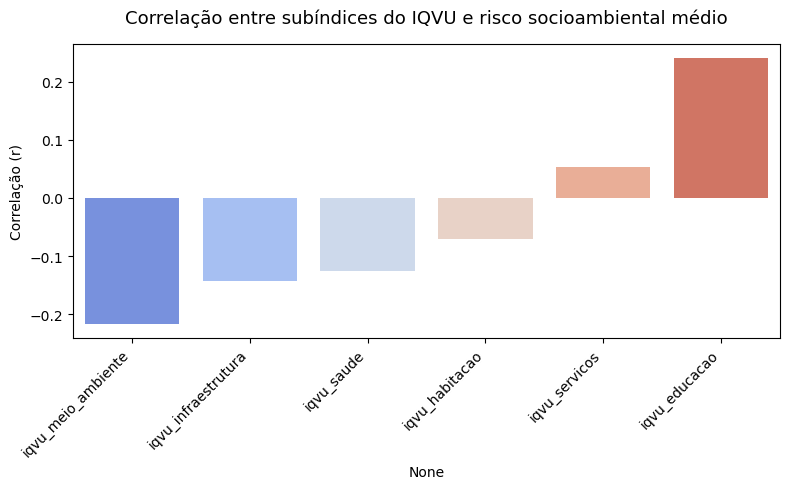

In [11]:


# Lista de subíndices do IQVU
subindices = [
    "iqvu_educacao",
    "iqvu_habitacao",
    "iqvu_infraestrutura",
    "iqvu_meio_ambiente",
    "iqvu_saude",
    "iqvu_servicos"
]

# Calcula correlação de cada subíndice com o risco socioambiental médio
corrs = {sub: dados_up[sub].corr(dados_up["CON_TOT"]) for sub in subindices}

# Transforma em DataFrame para visualizar melhor
corr_df = (
    pd.DataFrame.from_dict(corrs, orient="index", columns=["correlação"])
    .sort_values("correlação", ascending=True)
)

print(corr_df)

# Gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=corr_df.index, y=corr_df["correlação"], palette="coolwarm")
plt.title("Correlação entre subíndices do IQVU e risco socioambiental médio", fontsize=13, pad=15)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Correlação (r)")
plt.tight_layout()
plt.show()


Esse código faz um teste de correlação de Pearson pra ver o quanto cada tipo de risco (como alagamento, deslizamento ou inundação) está ligado ao risco total das áreas.
Ele calcula, pra cada variável, o valor do coeficiente r, que mostra se a relação é forte e se é positiva ou negativa, e o valor-p, que indica se essa relação é estatisticamente confiável.
No fim, ele organiza tudo em uma tabela com os resultados e salva como uma imagem, pra visualizar de forma simples quais tipos de risco mais influenciam no risco total.

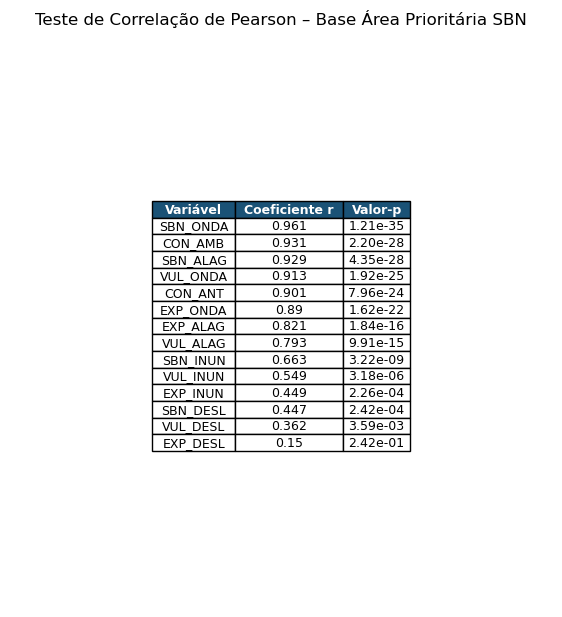

In [ ]:

from scipy.stats import pearsonr

# Lista das variáveis de risco
variaveis_risco = [
    'SBN_ALAG', 'SBN_DESL', 'SBN_INUN', 'SBN_ONDA',
    'EXP_ALAG', 'EXP_DESL', 'EXP_INUN', 'EXP_ONDA',
    'VUL_ALAG', 'VUL_DESL', 'VUL_INUN', 'VUL_ONDA',
    'CON_AMB', 'CON_ANT'
]

# Calcula o teste de Pearson
resultados = []
for var in variaveis_risco:
    r, p = pearsonr(resumo_up[var], resumo_up['CON_TOT'])
    resultados.append({
        "Variável": var,
        "Coeficiente r": round(r, 3),
        "Valor-p": f"{p:.2e}"
    })

pearson_df = pd.DataFrame(resultados).sort_values("Coeficiente r", ascending=False)

# Gera a imagem da tabela
fig, ax = plt.subplots(figsize=(7, len(pearson_df)*0.45 + 1))
ax.axis('off')

tabela = ax.table(
    cellText=pearson_df.values,
    colLabels=pearson_df.columns,
    cellLoc='center',
    loc='center'
)


tabela.auto_set_font_size(False)
tabela.set_fontsize(9)
tabela.auto_set_column_width(col=list(range(len(pearson_df.columns))))


for (row, col), cell in tabela.get_celld().items():
    if row == 0:
        cell.set_facecolor('#1a5276')
        cell.set_text_props(color='white', weight='bold')

plt.title("Teste de Correlação de Pearson – Base Área Prioritária SBN", fontsize=12, pad=15)

# Exporta a imagem 
plt.savefig("teste_pearson_sbn.png", dpi=300, bbox_inches="tight")
plt.show()




PERGUNTA 2